## TF-IDF

$TFIDF(t, d) = TF(t, d)xIDF(t)$

$tf_{i,j} =  \frac{n_{i,j}}{ \sum{n_{k,j}} }$

$idf_{i,j} =  \log{\frac{|D|}{ |{{d:f_{i}\in d| }}}}$

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
raw_data = pd.read_csv('news.csv')
raw_data.head(10)

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
5,6903,"Tehran, USA","\nI’m not an immigrant, but my grandparents ...",FAKE
6,7341,Girl Horrified At What She Watches Boyfriend D...,"Share This Baylee Luciani (left), Screenshot o...",FAKE
7,95,‘Britain’s Schindler’ Dies at 106,A Czech stockbroker who saved more than 650 Je...,REAL
8,4869,Fact check: Trump and Clinton at the 'commande...,Hillary Clinton and Donald Trump made some ina...,REAL
9,2909,Iran reportedly makes new push for uranium con...,Iranian negotiators reportedly have made a las...,REAL


In [3]:
raw_data['label'].value_counts() #data is balanced

REAL    3171
FAKE    3164
Name: label, dtype: int64

## CLEANING DATA

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer

In [5]:
raw_data.isnull().sum()

Unnamed: 0    0
title         0
text          0
label         0
dtype: int64

In [6]:
raw_data['label'] = raw_data['label'].map({"FAKE": 0, "REAL" : 1})
raw_data

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1
...,...,...,...,...
6330,4490,State Department says it can't find emails fro...,The State Department told the Republican Natio...,1
6331,8062,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,0
6332,8622,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,0
6333,4021,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",1


In [7]:
labels = raw_data.label
x_train, x_test, y_train,y_test = train_test_split(raw_data[ 'text'], labels, test_size = 0.2, random_state = 42)

## MODEL

In [8]:
tf_idf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7) #ignore terms that appear in more than 70% of the documents

tfidf_train = tf_idf_vectorizer.fit_transform(x_train)
tfidf_test = tf_idf_vectorizer.transform(x_test)

In [9]:
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score
passive_agressive_classifier = PassiveAggressiveClassifier(max_iter = 50) #num of epochs
passive_agressive_classifier.fit(tfidf_train, y_train)


PassiveAggressiveClassifier(max_iter=50)

# TEST

In [10]:
y_pred = passive_agressive_classifier.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy score is : {}'.format(score*100))

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score


cm = confusion_matrix(y_test,y_pred)
cm

Accuracy score is : 93.29123914759275


array([[586,  42],
       [ 43, 596]], dtype=int64)

In [11]:
print("Classification Report : \n\n {}".format(classification_report(y_test, y_pred)))

Classification Report : 

               precision    recall  f1-score   support

           0       0.93      0.93      0.93       628
           1       0.93      0.93      0.93       639

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267



In [12]:
print("Precision score :  {}. \n Recall score: {}".format(precision_score(y_test, y_pred), recall_score(y_test, y_pred)))

Precision score :  0.9341692789968652. 
 Recall score: 0.9327073552425665


PRECISION: 93% of positive identifications were correct. 


RECALL: 93% of actual positives were identified correctly. 

In [25]:
from sklearn.metrics import auc
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
auc = auc(recall, precision)
print(auc)

0.950407535746393


Text(0, 0.5, 'Precision')

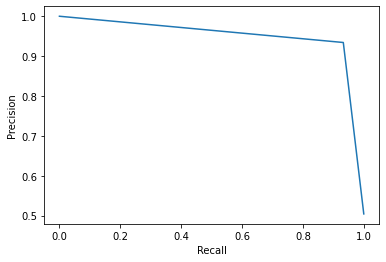

In [26]:
import matplotlib.pyplot as plt
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

AUC =  0.95, as it is close to 1 it is a good result, ROC help us to get specific precision with respect to recall and vice versa